# Anova

Note: This notebook will use the same veryants.csv files

ANOVA tests the null hypothesis that `all groups have the same population mean` (eg., the true average price of a sale is the same at every location of VeryAnts).

In [3]:
from scipy.stats import f_oneway
import pandas as pd

In [4]:
veryants = pd.read_csv('veryants.csv')

In [6]:
# store the data
a = veryants.Sale[veryants.Store == 'A']
b = veryants.Sale[veryants.Store == 'B']
c = veryants.Sale[veryants.Store == 'C']

In [6]:
fstat, pval = f_oneway(a,b,c)
pval

0.00015355234908845413

##### If the p-value is below our significance threshold, we can conclude that at least one pair of our groups earned significantly different scores on average however, we won’t know which pair until we investigate further!

# Tukey's Range Test

Now, we want to find out which pair of stores are different

In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [10]:
tukey_results =  pairwise_tukeyhsd(veryants.Sale, veryants.Store, 0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   7.2763  0.001  3.2263 11.3264   True
     A      C    4.011 0.0529 -0.0391  8.0611  False
     B      C  -3.2653  0.141 -7.3154  0.7847  False
----------------------------------------------------


### Conclusion:

This result is different from our previous experiment using `Multiple test` (The Store A vs C  Sales Comparison)

P-values less than 0.05 are significant.

True = Reject the Null and use the alternative hypothesis (significant)

False = Accept the null (not significant)



`A vs B` TRUE are significantly diffirent

`A vs C` FALSE are notsignificantly diffirent 

`B vs C` FALSE are not significantly diffirent 


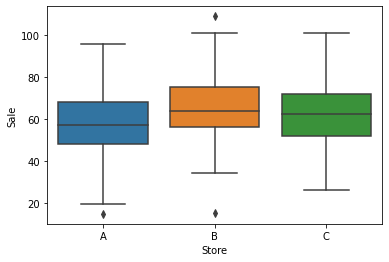

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=veryants, x='Store', y='Sale')
plt.show()